# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

c:\Users\Lenovo\Documents\Program\Python\submission 2\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Memuat dataset dari kaggle

In [2]:
path = kagglehub.dataset_download("ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo")
print("Path to dataset files:", path)
df = pd.read_csv(path + "/Live.csv")

Path to dataset files: C:\Users\Lenovo\.cache\kagglehub\datasets\ashishg21\facebook-live-sellers-in-thailand-uci-ml-repo\versions\1


Memuat dataset dari lokal

In [3]:
df = pd.read_csv("Dataset_inisiasi.csv")

Melakukan pengecekan

In [4]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### Mengecek Dataset
Melihat struktur data, missing value dan duplikasi pada data yang ada

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

Memeriksa duplikasi

In [6]:
df.duplicated().sum()

np.int64(51)

Mengecek Missing Values

In [7]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

Memeriksa informasi statistik dari data

In [8]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


Pada Columns1 hingga Columns4, terdapat nilai yang kosong sejumlah instance yang ada yaitu 7050. Maka dari itu, fitur tersebut harus di drop agar tidak mengganggu eksplorasi data.

In [9]:
df.drop(labels=['Column1','Column2','Column3','Column4'],axis=1,inplace=True)

Memeriksa informasi statistik fitur category

In [10]:
df.describe(include='object')

,status_id,status_type,status_published
count,7050,7050,7050
unique,6997,4,6913
top,246675545449582_429583263825475,photo,3/20/2018 1:54
freq,2,4288,3


Terdapat 6.997 label unik dalam kolom status_id dan 6.913 label unik dalam kolom status_published, dengan total 7.050 instance dalam dataset. Karena status_id berfungsi sebagai identifier, serta jumlah label unik yang tinggi dapat menyebabkan Curse of Dimensionality jika dikonversi menjadi variabel numerik melalui teknik seperti One-Hot Encoding, maka kedua kolom ini tidak akan digunakan dalam analisis.

### Analisis Korelasi dan Visualisasi

Korelasi Variabel Numerik

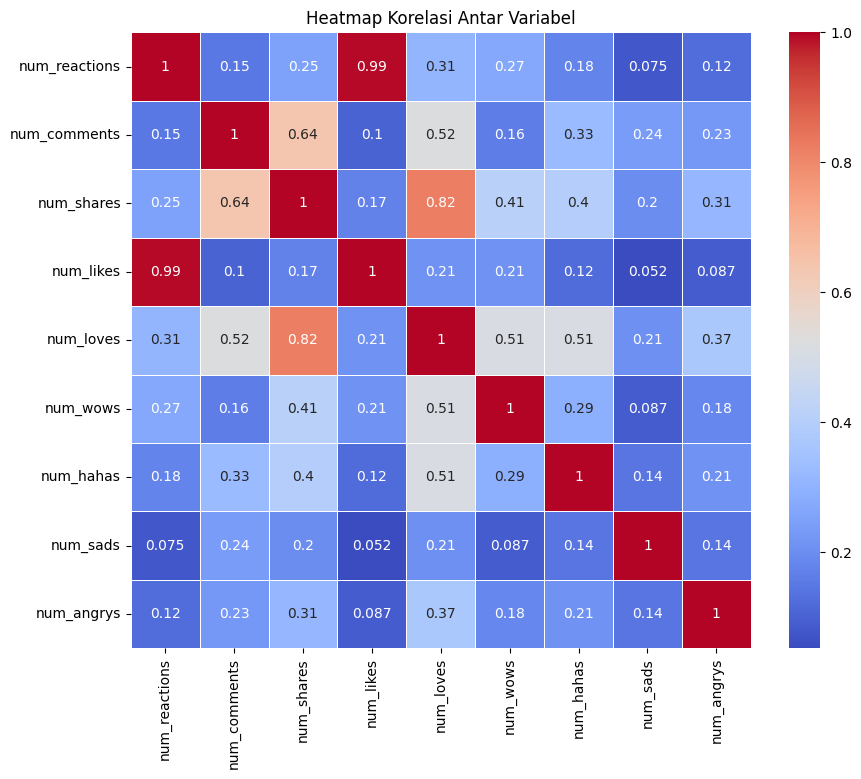

In [11]:
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

Korelasi sangat tinggi antara num_reactions dan num_likes (0.99).
num_shares dan num_loves (0.82) menunjukkan bahwa konten yang banyak dibagikan juga mendapatkan lebih banyak "Love".
num_comments dan num_shares (0.64) menunjukan bahwa semakin banyak dibagikan, semakin banyak pula yang dikomentari.

Distribusi Korelasi Antar Variabel

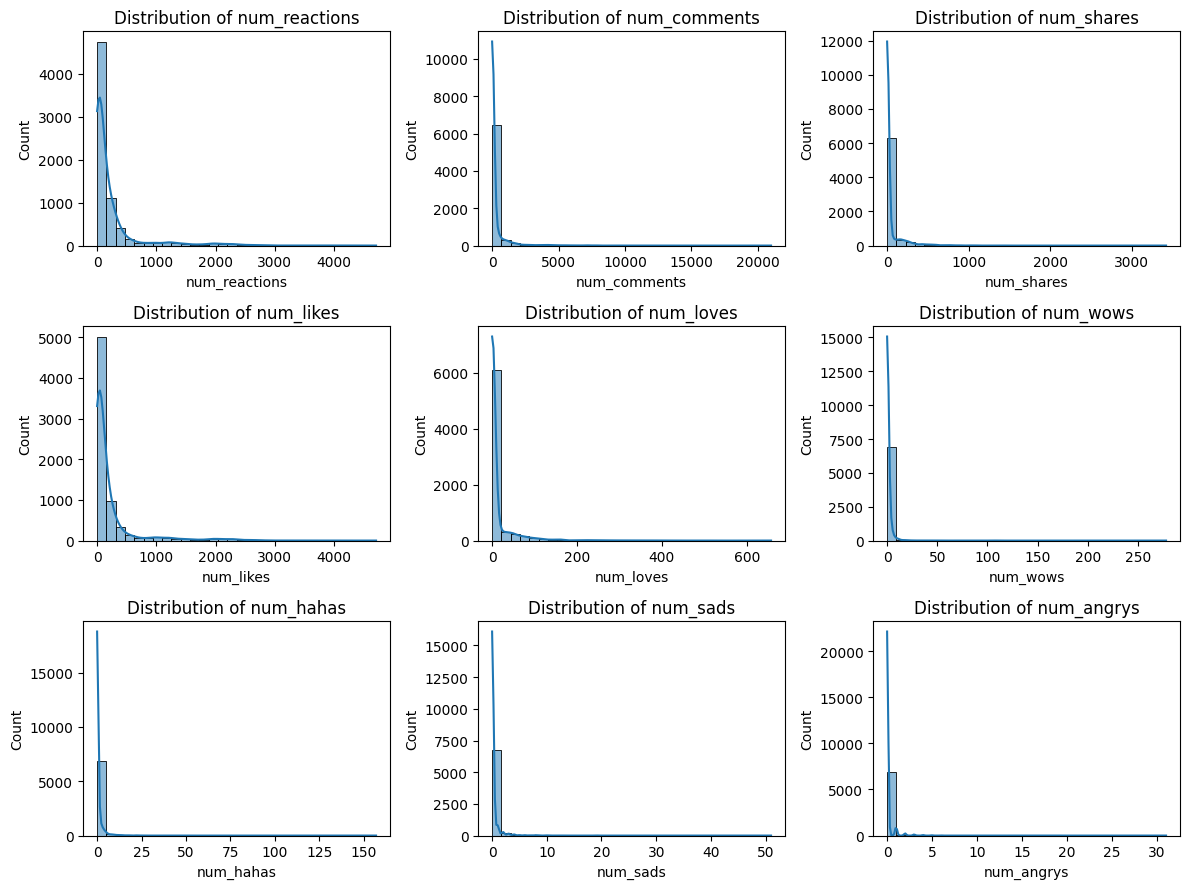

In [12]:
num_features = len(corr)
cols = 3
rows = int(np.ceil(num_features / cols))

fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 3))
axes = axes.flatten()

for i, feature in enumerate(corr):
    sns.histplot(df[feature], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Dapat dilihat bahwa semua variabel numerik memiliki distribusi sangat condong ke kanan (skewed right). Mayoritas data berada di rentang nilai rendah, dengan beberapa nilai ekstrem yang tinggi. Selain itu, "num_reactions", "num_comments", dan "num_shares" memiliki rentang nilai yang jauh lebih besar dibanding lainnya.

Distribusi Tipe Status

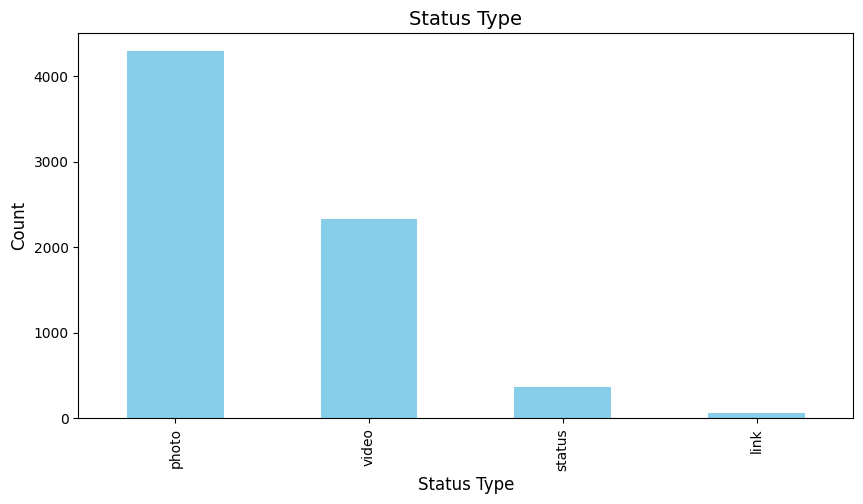

In [13]:
plt.figure(figsize=(10, 5))
ax = df['status_type'].value_counts().plot(kind='bar', color='skyblue')

ax.set_title("Status Type", fontsize=14)
ax.set_xlabel("Status Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

Dari hasil ini, bisa diasumsikan bahwa foto dan video adalah format konten yang lebih sering digunakan di Facebook dibandingkan status teks atau tautan.

Distribusi Komentar Pada Postingan

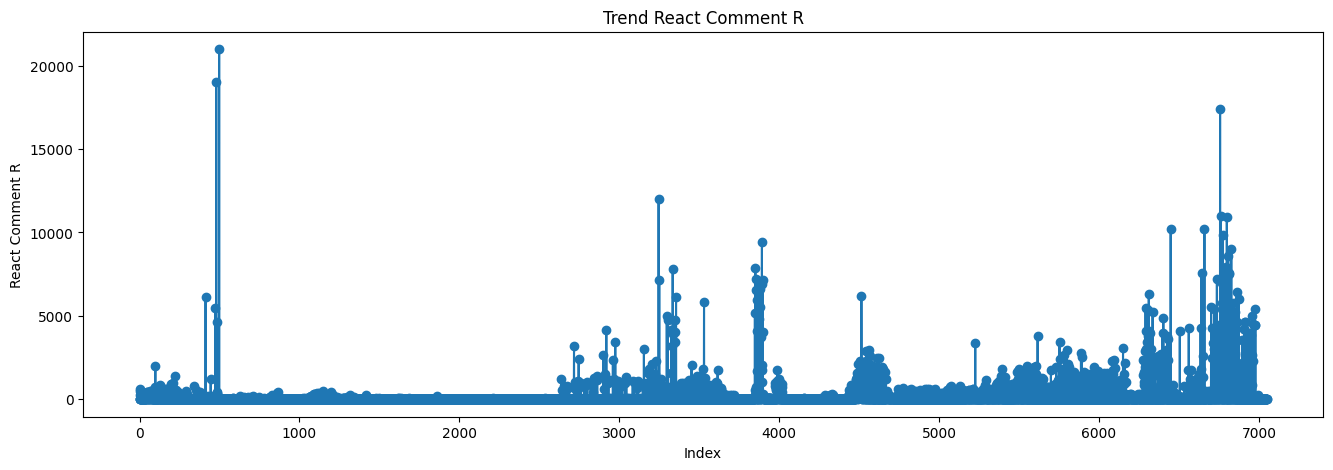

In [14]:
plt.figure(figsize=(16, 5))
plt.plot(df['num_comments'], marker='o', linestyle='-')
plt.xlabel("Index")
plt.ylabel("React Comment R")
plt.title("Trend React Comment R")
plt.show()

Ada perbedaan jumlah komentar yang besar. Hal ini menunjukkan bahwa data memiliki variasi yang tinggi, sehingga perlu dilakukan normalisasi sebelum clustering.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

### Missing value dan Duplikat

In [15]:
df.isnull().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

Sudah tidak ada missing values dalam data sehingga tidak perlu ada penanganan apapun.

Menghapus duplikasi pada data

In [16]:
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah data duplikat: {jumlah_duplikat}")

df.drop_duplicates(inplace=True)

jumlah_akhir = df.shape[0]
print(f"Jumlah data setelah menghapus duplikat: {jumlah_akhir}")

df_cleaned = df.copy()

Jumlah data duplikat: 51
Jumlah data setelah menghapus duplikat: 6999


Menghapus fitur yang tidak relevan dalam analisis

In [17]:
df.drop(labels=['status_id', 'status_published'],axis=1,inplace=True)

### Deteksi Outlier

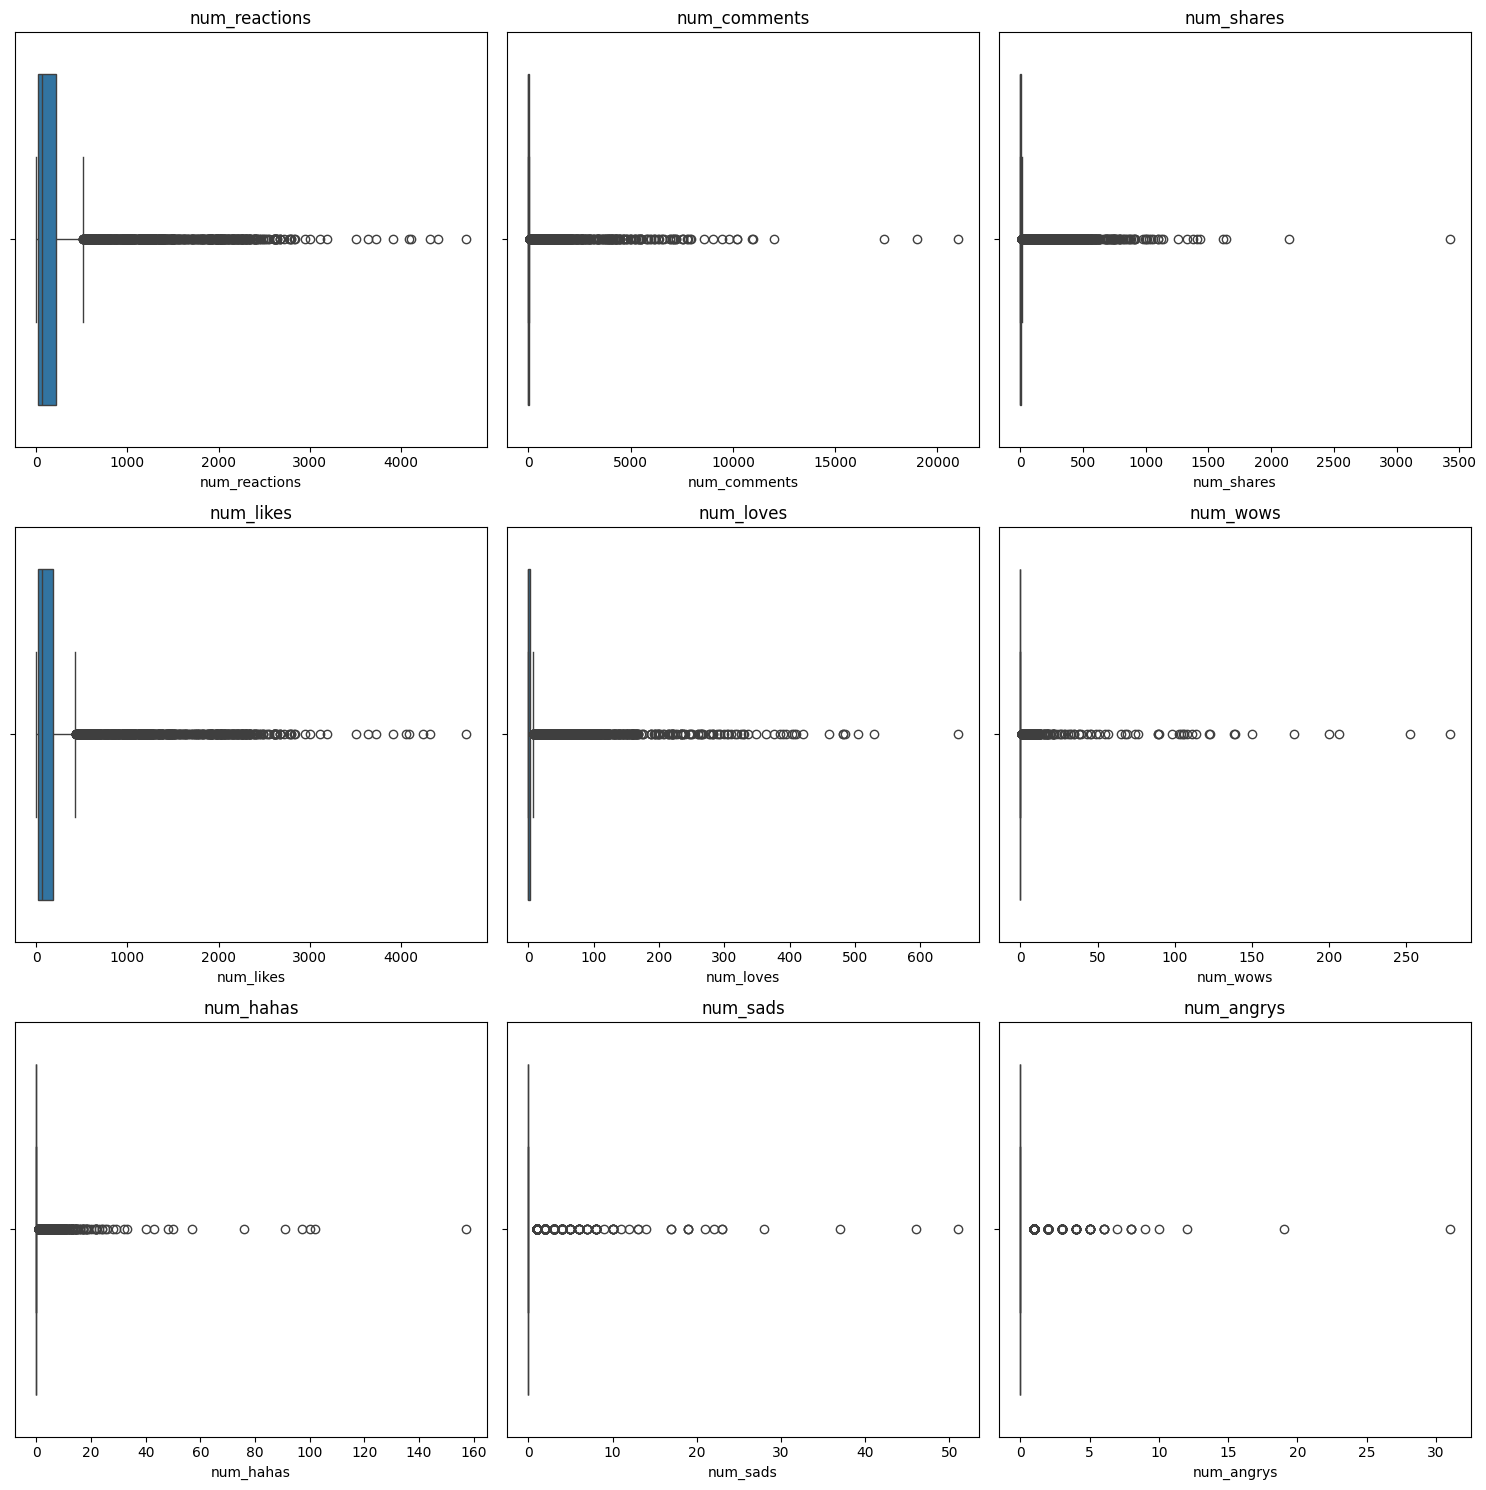

In [18]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(nrows=(len(numerical_cols) - 1) // 3 + 1, ncols=3, figsize=(15, 5 * ((len(numerical_cols) - 1) // 3 + 1)))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Dalam proses clustering ini, saya memilih untuk **tidak menangani outlier** karena data outlier seperti jumlah shares, comments dan reaction merupakan informasi penting yang dapat membentuk karakteristik unik dari masing-masing cluster. Menghapus atau mengubah outlier dapat menghilangkan pola signifikan dalam data.

### Melakukan Encoding

Melakukan One Hot Encoding pada fitur *status_type*

In [19]:
df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded, columns=["status_type"], dtype=int)

In [20]:
df_encoded.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,529,512,262,432,92,3,1,1,0,0,0,0,1
1,150,0,0,150,0,0,0,0,0,0,1,0,0
2,227,236,57,204,21,1,1,0,0,0,0,0,1
3,111,0,0,111,0,0,0,0,0,0,1,0,0
4,213,0,0,204,9,0,0,0,0,0,1,0,0


### Normalisasi atau Standarisasi Fitur

Melakukan Normalisasi 

In [21]:
scaler = MinMaxScaler()
df_scaled = df_encoded.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

MinMaxScaler mempertahankan distribusi asli data tanpa mengubah skala outlier secara drastis, sehingga tetap dapat menangkap perbedaan antar cluster dengan lebih baik.

In [22]:
df_scaled.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0,0,0,1
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0,1,0,0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0,0,0,1
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0,1,0,0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0,1,0,0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

Menggunakan algoritma K-Means untuk Clustering

In [23]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled)

df_clustered = df_scaled.copy()
df_clustered['Cluster'] = clusters

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Elbow Method

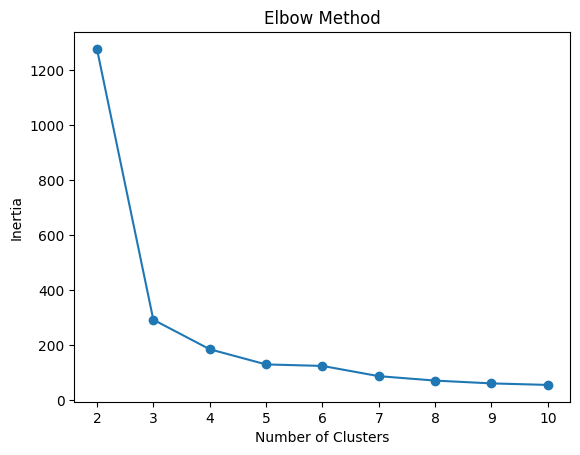

In [24]:
inertia = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_clustered)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [25]:
silhouette_avg = silhouette_score(df_clustered, kmeans.labels_)
print(f"The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.7290137530418836


Sebelum melakukan feature selection, didapatkan silhouette score sebesar 0,73. Meskipun sudah cukup tinggi, tapi kita bisa mencoba untuk melakukan feature selection untuk meningkatkan kualitas clustering.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

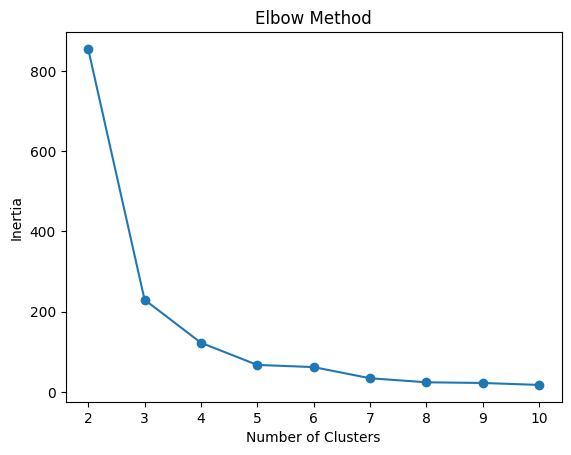

In [26]:
selector = VarianceThreshold(threshold=0.008)
df_selected = selector.fit_transform(df_scaled)

inertia = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled[df_scaled.columns[selector.get_support()]])
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [27]:
column_selected = df_scaled.columns[selector.get_support()]
print(f"Jumlah fitur sebelum feature selection: {len(df_scaled.columns)}")
print(f"Jumlah fitur setelah feature selection: {len(column_selected)}")
print(f"Fitur yang dipilih: {list(column_selected)}")

Jumlah fitur sebelum feature selection: 13
Jumlah fitur setelah feature selection: 6
Fitur yang dipilih: ['num_reactions', 'num_likes', 'status_type_link', 'status_type_photo', 'status_type_status', 'status_type_video']


Melakukan clustering ulang dengan fitur yang sudah diseleksi

In [28]:
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df_scaled[column_selected])

Mengecek silhouette score

In [29]:
silhouette_avg_selection = silhouette_score(df_scaled[column_selected], kmeans.labels_)
print(f"The average silhouette score is: {silhouette_avg_selection:.4f}")

The average silhouette score is: 0.9221


Perbedaan Silhouette Score

In [30]:
print("Sebelum feature selection", silhouette_avg)
print("Setelah feature selection", silhouette_avg_selection)

Sebelum feature selection 0.7290137530418836
Setelah feature selection 0.9221076867556685


Peningkatan dari sekitar 0.73 menjadi 0.92 menunjukkan bahwa proses feature selection sangat efektif dalam menghasilkan clustering yang lebih baik, dengan memilih 6 fitur yang paling relevan dari 13 fitur sebelumnya.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau PCA projection.

Visualisasi hasil clustering dengan 3D PCA Projection

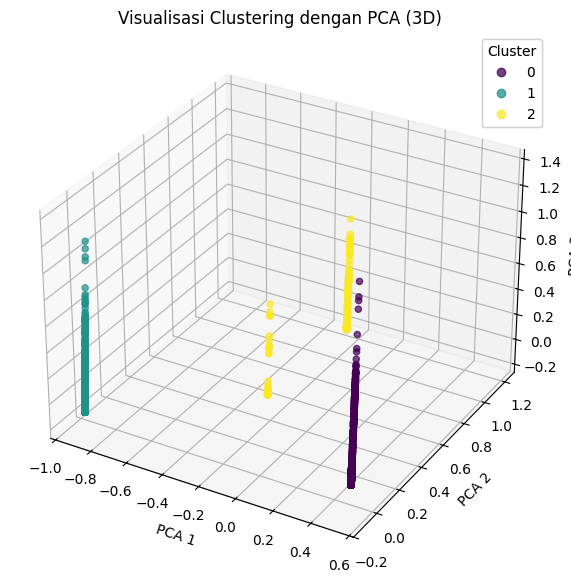

In [31]:
df_selected = df_scaled[column_selected].copy()
df_selected['Cluster'] = clusters

pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_selected.drop(columns=["Cluster"]))

df_pca = pd.DataFrame(df_pca, columns=["PCA 1", "PCA 2", "PCA 3"])
df_pca["Cluster"] = clusters

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_pca["PCA 1"], df_pca["PCA 2"], df_pca["PCA 3"],
                     c=df_pca["Cluster"], cmap="viridis", alpha=0.7)

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.set_title("Visualisasi Clustering dengan PCA (3D)")

legend = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend)

plt.show()

Visualisasi hasil clustering dengan scatter plot

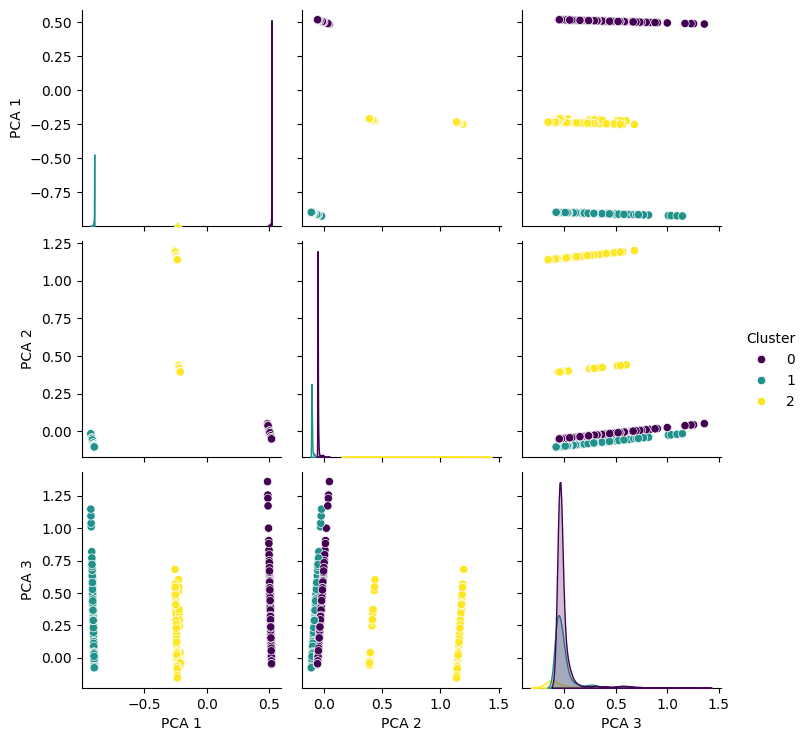

In [32]:
sns.pairplot(df_pca, hue="Cluster", palette="viridis")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

Saya telah menyimpan original dataset, sehingga tidak diperlukan inverse transform terlebih dahulu untuk mengembalikan skala ataupun lainnya.

In [33]:
df_final = df_cleaned.copy()
selected_features = ['num_reactions', 'num_likes', 'status_type']
df_final = df_final[selected_features]
df_final['Cluster'] = clusters
df_final.head()

,num_reactions,num_likes,status_type,Cluster
0,529,432,video,1
1,150,150,photo,0
2,227,204,video,1
3,111,111,photo,0
4,213,204,photo,0


Terlihat jelas bahwa label cluster sudah berhasil ditambahkan ke dataframe yang baru. Fitur-fitur dalam dataframe tersebut sudah kembali ke dalam skala asli.

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [34]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

desc_df = df_final.groupby('Cluster').agg({
    'num_reactions': ['mean', 'std', 'min', 'max'],
    'num_likes': ['mean', 'std', 'min', 'max'],
    'status_type':[('mode', lambda x: x.mode().iloc[0]),
                  ('count', lambda x: (x == x.mode().iloc[0]).sum())],
})

desc_df

num_reactions                         num_likes                        \
                 mean         std min   max        mean         std min   max   
Cluster                                                                         
0          172.330820  424.942449   0  4710  170.002356  422.930092   0  4710   
1          283.369910  446.696999   0  4094  242.967853  413.261014   0  4094   
2          431.902844  627.936660   1  2799  429.106635  626.504540   1  2799   

        status_type        
               mode count  
Cluster                    
0             photo  4244  
1             video  2333  
2            status   359

## **Analisis Karakteristik Tiap Cluster**  

#### **Cluster 0 (Photo-Dominant, Engagement Rendah)**  
##### **Karakteristik Utama:**  
- Jumlah Postingan: 4,244  
- Rata-rata Reaksi: 172,33 (terendah dibandingkan cluster lain)  
- Rata-rata Likes: 170,00
- Sebaran Engagement: Standar deviasi tinggi (424,94), artinya ada variasi yang cukup besar dalam jumlah interaksi  
- Dominasi Postingan: Photo (gambar)  

##### **Analisis**  
- Cluster ini berisi mayoritas postingan, namun engagement relatif rendah
- Sebagian besar konten dalam cluster ini adalah foto, yang mungkin kurang menarik jika tidak didukung oleh caption atau konteks yang kuat
- Sebaran engagement yang tinggi menunjukkan ada beberapa postingan yang berhasil mendapatkan banyak interaksi, namun mayoritas memiliki engagement rendah  

#### **Cluster 1 (Video-Dominant, Engagement Sedang)**  
##### **Karakteristik Utama:**  
- Jumlah Postingan: 2,333  
- Rata-rata Reaksi: 283,37  
- Rata-rata Likes: 242,97
- Sebaran Engagement: Standar deviasi tinggi (446,70), ada variasi besar dalam interaksi.  
- Dominasi Postingan: Video  

##### **Analisis:**  
- Engagement lebih tinggi dibandingkan cluster pertama yang didominasi oleh photo, menunjukkan bahwa video lebih menarik bagi audiens
- Variasi engagement cukup besar, yang menunjukkan bahwa tidak semua video mendapatkan atensi yang sama yang mungkin bisa dipengaruhi oleh durasi, isi, atau kualitas video yang digunakan

#### **Cluster 2 (Status/Teks-Dominant, Engagement Tinggi)**  
##### **Karakteristik Utama:**  
- Jumlah Postingan: 359   
- Rata-rata Reaksi: 431,90
- Rata-rata Likes: 429,11
- Sebaran Engagement: Standar deviasi tinggi (627,94). Beberapa postingan mendapatkan engagement sangat tinggi
- Dominasi Postingan: Status/Teks

##### **Analisis:**  
- Cluster ini menunjukkan engagement yang dihasilkan sangat tinggi dan didominasi oleh status text yang menarik audiens
- Standar deviasi yang tinggi menunjukkan adanya postingan dengan engagement luar biasa tinggi, tetapi juga ada yang tidak begitu menarik perhatian

Berdasarkan hasil tersebut, terdapat pola-pola bisnis yang dapat dimanfaatkan untuk meningkatkan engagement pada postingan yang dibuat. Setiap cluster memiliki karakteristik yang berbeda, yang menunjukkan preferensi audiens terhadap berbagai jenis konten. Dengan memahami pola engagement ini, kita dapat lebih menyesuaikan strategi pemasaran digital.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [35]:
df_clustered = df_scaled.copy()
df_clustered = df_clustered[column_selected]
df_clustered['Cluster'] = clusters
df_clustered.to_csv('Dataset_clustering.csv', index=False)